<a href="https://colab.research.google.com/github/Uz8351/MyPhython/blob/master/Desc_grad_tipo_adagrad_Aula_20_18_OCT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Iteración 0: Costo = 42.44086748547809, Parámetros = [0.56 0.56]
 iteracion 0--> Valor: 42.44086748547809
 iteracion 1--> Valor: 40.817317846937826
 iteracion 2--> Valor: 39.70013656306937
 iteracion 3--> Valor: 38.80533727498658
 iteracion 4--> Valor: 38.042555786269546
 iteracion 5--> Valor: 37.36962719579369
 iteracion 6--> Valor: 36.76289364541446
 iteracion 7--> Valor: 36.207524406747496
 iteracion 8--> Valor: 35.69350221512708
 iteracion 9--> Valor: 35.21368704590643
 iteracion 10--> Valor: 34.762778288585984
 iteracion 11--> Valor: 34.33671333607574
 iteracion 12--> Valor: 33.93229741914358
 iteracion 13--> Valor: 33.54696455214915
 iteracion 14--> Valor: 33.17861696690416
 iteracion 15--> Valor: 32.82551367774505
 iteracion 16--> Valor: 32.486190972530814
 iteracion 17--> Valor: 32.159404319126665
 iteracion 18--> Valor: 31.84408503548846
 iteracion 19--> Valor: 31.539307382830806
 iteracion 20--> Valor: 31.244263173006097
 iteracion 21--> Valor: 30.95824189430963
 iteracion 22

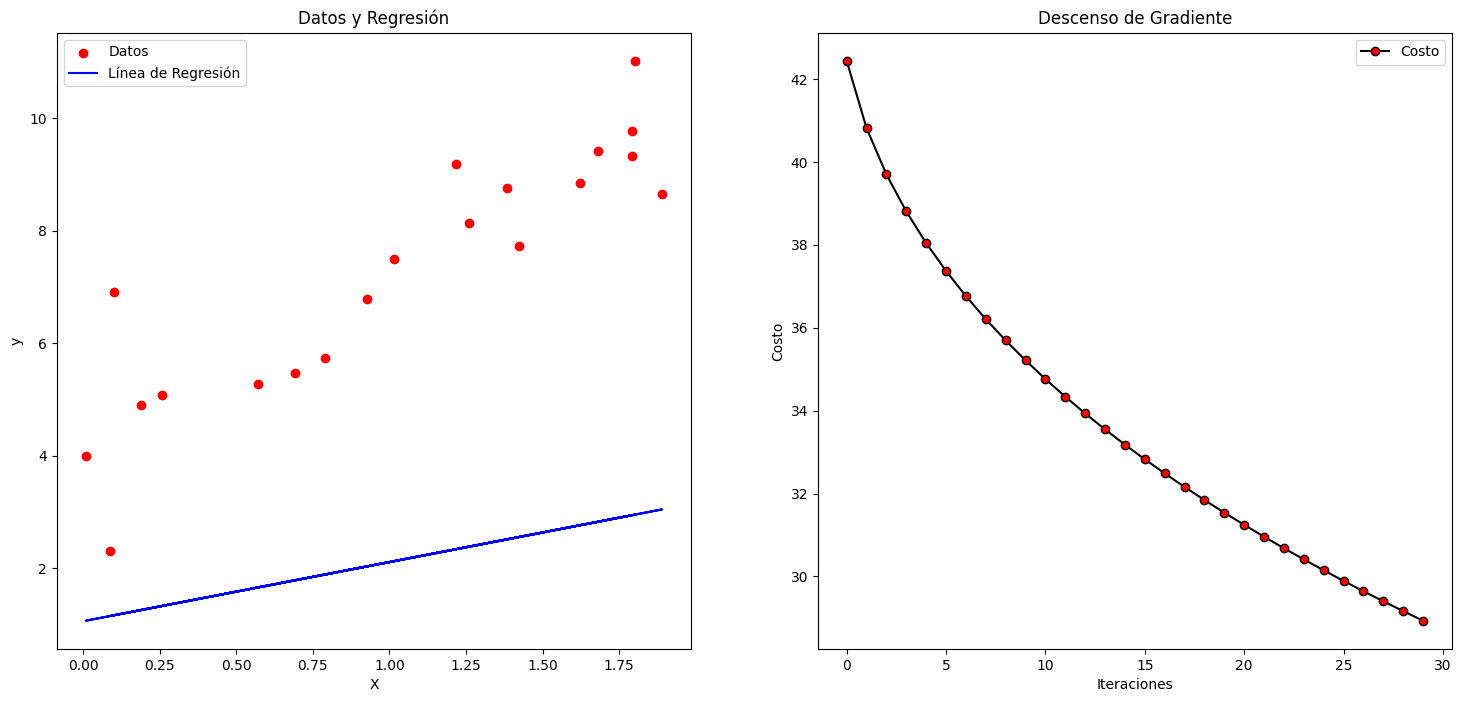

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Datos sintéticos del ejemplo
X = 2 * np.random.rand(20, 1)
y = 4 + 3 * X + np.random.randn(20, 1)

# Inicialización de parámetros
theta = np.array([0.5, 0.5])  # Parámetros iniciales
learning_rate = 0.06 # Tasa de aprendizaje inicial
epsilon = 1e-7  # Pequeña constante para evitar divisiones por cero
G = np.zeros(theta.shape)  # Inicialización de la acumulación de gradientes cuadrados

# Número de iteraciones
iterations = 30

# Listas para almacenar los valores de los parámetros y el costo
theta_values = []
cost_values = []

for iteration in range(iterations):
    # Calcular las predicciones
    predictions = X * theta[0] + theta[1]

    # Calcular el error
    error = predictions - y

    # Calcular los gradientes
    gradient = np.array([np.sum(error * X), np.sum(error)])

    # Acumular el cuadrado de los gradientes
    G += gradient ** 2

    # Calcular la tasa de aprendizaje adaptativa
    adaptive_learning_rate = learning_rate / (np.sqrt(G) + epsilon)

    # Actualizar los parámetros usando Adagrad
    theta -= adaptive_learning_rate * gradient

    # Calcular la función de costo (en este caso, error cuadrático medio)
    cost = np.mean((error ** 2))

    # Almacenar los valores de los parámetros y el costo
    theta_values.append(theta.copy())
    cost_values.append(cost)

    # Mostrar el progreso cada 100 iteraciones
    if iteration % 100 == 0:
        print(f"Iteración {iteration}: Costo = {cost}, Parámetros = {theta}")
for iten , mis_costos in enumerate(cost_values ):
      print(f' iteracion {iten}--> Valor: {mis_costos}')

print(f"Resultado final: Parámetros = {theta}")

# Graficar los datos y la línea de regresión
plt.figure(figsize=(18, 8))
plt.subplot(1, 2, 1)
plt.scatter(X, y, color='red', label='Datos')
plt.plot(X, X * theta[0] + theta[1], color='blue',label='Línea de Regresión')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Datos y Regresión')
plt.legend()

# Graficar los valores de descenso de gradiente
plt.subplot(1, 2, 2)
plt.plot(range(iterations), cost_values, color='black',marker='o',markerfacecolor='red', label='Costo')
plt.xlabel('Iteraciones')
plt.ylabel('Costo')
plt.title('Descenso de Gradiente')
plt.legend()

plt.show()
